# Boston House Price Prediciton - Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns

### Load dataset

In [3]:
df = pd.read_csv('boston.csv')

### Lets check the description of dataset

In [4]:
df.shape

(506, 14)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### Summarizing the dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [8]:
# Checking missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

### EDA

In [9]:
# Correlation

df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


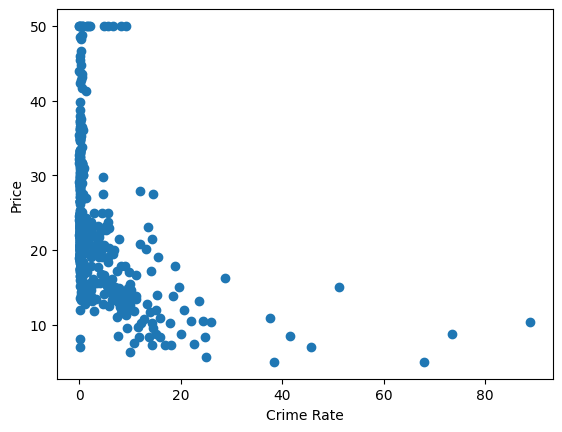

In [10]:
plt.scatter(df['CRIM'],df['PRICE'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')
plt.show()

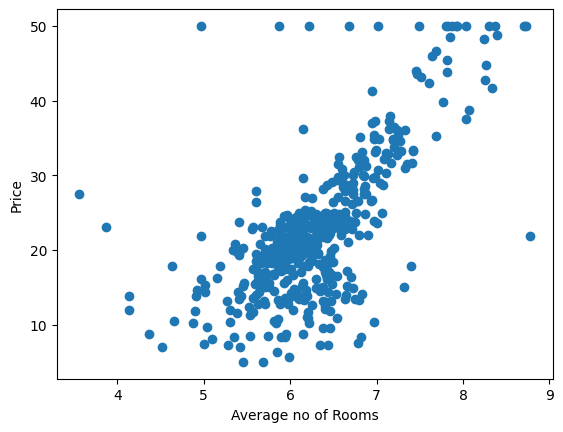

In [11]:
plt.scatter(df['RM'],df['PRICE'])
plt.xlabel('Average no of Rooms')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='RM', ylabel='PRICE'>

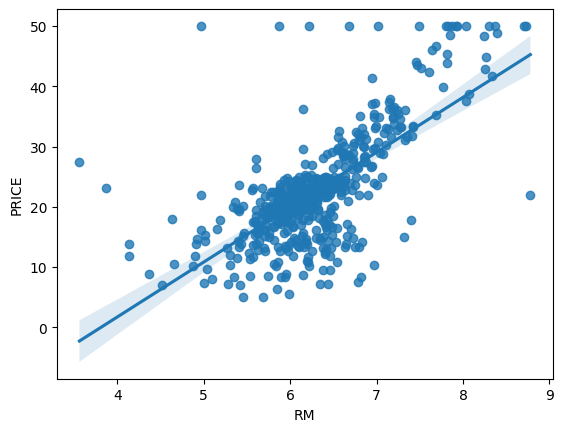

In [12]:
sns.regplot(data=df,x=df['RM'],y=df['PRICE'])

<Axes: xlabel='LSTAT', ylabel='PRICE'>

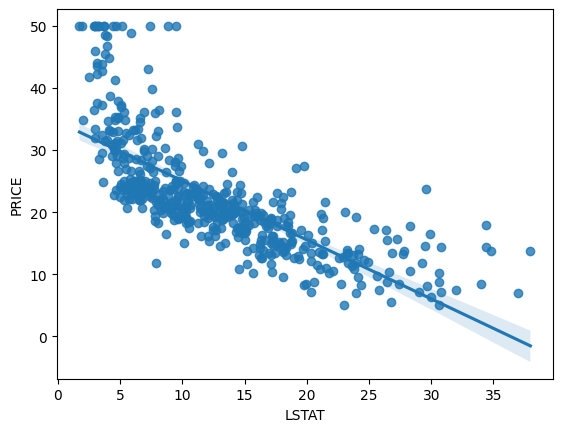

In [13]:
sns.regplot(data=df,x=df['LSTAT'],y=df['PRICE'])

<Axes: xlabel='CHAS', ylabel='PRICE'>

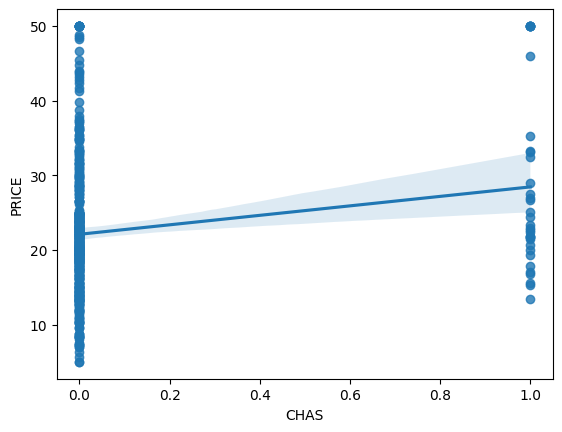

In [14]:
sns.regplot(data=df,x=df['CHAS'],y=df['PRICE'])

### Independent and Dependent features

In [15]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [17]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [18]:
# Train Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13


In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [21]:
# Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
X_train=scaler.fit_transform(X_train)

In [23]:
X_test=scaler.fit_transform(X_test)

In [24]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

### Model Training

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
regression=LinearRegression()

In [27]:
regression.fit(X_train,y_train)

LinearRegression()

In [28]:
#print coefficient and intercept
print(regression.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [29]:
print(regression.intercept_)

23.01581920903955


In [30]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [31]:
# Prediction
reg_pred=regression.predict(X_test)

In [32]:
reg_pred

array([30.77834822, 38.66581541, 16.96705276, 26.79035818, 20.36068008,
       24.89386356, 18.98948959, 15.44554414, 24.50205701, 22.12455513,
       27.16709892, 20.60218969, -4.91312377, 23.45520373, 20.44300739,
       27.97454642, 21.82481134,  6.80793603, 43.13876668, 19.08804672,
       28.93737925, 31.91943808, 12.05148619, 25.41493356, 19.60614164,
       17.23543021, 24.61263361, 16.907528  , 24.25623469, 20.73183868,
       23.98650325, 26.66317526, 27.45468242, 19.57475267, 18.15660164,
       19.94422395, 33.04896681, 21.26475982, 25.83570427, 26.36436267,
       15.22545112, 33.61610719, 45.24385042, 18.83620774, 28.91584593,
       18.49470905, 14.91054896, 27.65199578, 21.75498681, 32.36964545,
       23.36168054, 36.5955736 , 16.82098601, 27.59874838, 42.39261672,
       24.39945725, 20.42785358, 34.46608842, 26.52068304, 14.0304141 ,
       24.03170468, 32.40960974, 33.59067192, 17.33583061, 22.46180876,
       18.28308242, 22.01801285, 27.57486429, 32.54366102, 13.95

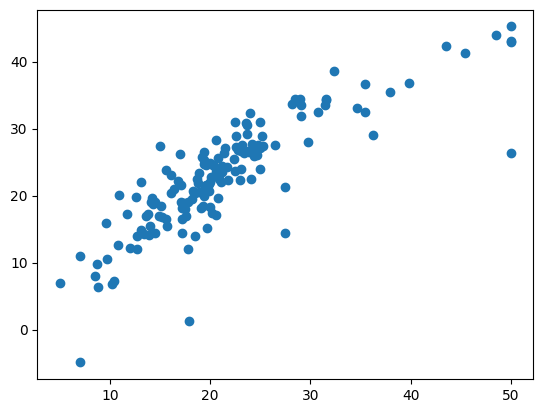

In [33]:
#plot scatter plot for prediction
plt.scatter(y_test,reg_pred)

In [34]:
# Residuals (errors)
residuals=y_test-reg_pred

In [35]:
residuals

173   -7.178348
274   -6.265815
491   -3.367053
72    -3.990358
452   -4.260680
         ...   
441   -1.932183
23     0.024974
225    7.112374
433   -4.399470
447   -7.225302
Name: PRICE, Length: 152, dtype: float64

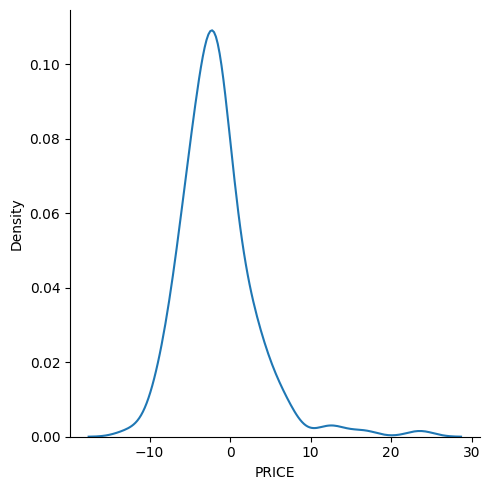

In [36]:
#Plot residuals
sns.displot(residuals,kind='kde')

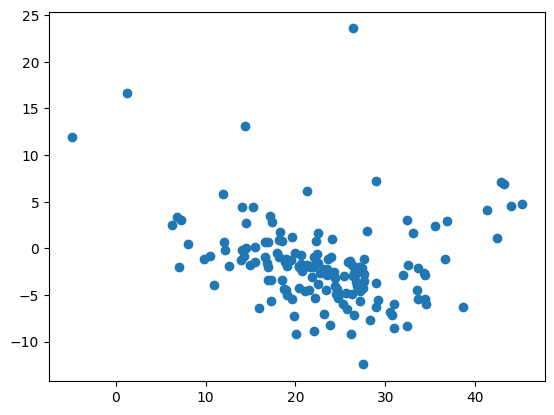

In [37]:
# Scatter plot with respective prediction and residuals
plt.scatter(reg_pred,residuals)

uniform distribution

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.744212793154547
24.134791289067547
4.912717301969201


#### R2 square and adjusted R square

In [39]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.6761000049033608


In [40]:
#Adjusted R2 square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1] - 1)

0.6455876865246919

### New Data Prediction

In [41]:
newDataPred=np.array(list(df.iloc[0,:-1]))

In [42]:
newDataPred.reshape(1,-1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [43]:
regression.predict(scaler.transform(newDataPred.reshape(1,-1)))

array([32.36964545])

### Picking the model file for deployment

In [44]:
import pickle

In [45]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [46]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [47]:
# Prediction
pickled_model.predict(scaler.transform(newDataPred.reshape(1,-1)))

array([32.36964545])